In [8]:
import h5py
import pandas as pd
import os
import matplotlib.pyplot as plt
import math

In [2]:
df_imp_R = pd.read_csv('../../../Data/North_Anatolian_Fault/Raw/ismpetpasa Julynov2023.txt',delimiter=',')
df_imp_R

,ismpetpasaDay,IsmSouth,IsmDegC,IsmRain,IsmmB,IsmNorth
0,07/16/2023 16:15:00,5.2687,27.55,0.0,907.7,0.0590
1,07/16/2023 16:16:00,5.2687,27.53,0.0,907.8,0.0587
2,07/16/2023 16:17:00,5.2687,27.51,0.0,907.8,0.0590
3,07/16/2023 16:18:00,5.2687,27.51,0.0,907.8,0.0587
4,07/16/2023 16:19:00,5.2687,27.48,0.0,907.9,0.0587
...,...,...,...,...,...,...
161731,11/05/2023 23:46:00,6.2381,14.12,0.0,901.3,0.3103
161732,11/05/2023 23:47:00,6.2381,14.12,0.0,901.3,0.3103
161733,11/05/2023 23:48:00,6.2381,14.12,0.0,901.4,0.3103
161734,11/05/2023 23:49:00,6.2381,14.10,0.0,901.3,0.3103


In [3]:
df_imp_R2 = pd.read_excel('../../../Data/North_Anatolian_Fault/Raw/Ismetpasa Dextral slip Feb-July 2023.xlsx')
df_imp_R2

,date,degC,rainmm,barometer mb,"dextral slip, mm"
0,2023-02-01 00:02:00,1.18,0.0,897.0,0.000000
1,2023-02-01 00:03:00,1.18,0.0,896.9,0.000000
2,2023-02-01 00:04:00,1.18,0.0,897.0,0.000000
3,2023-02-01 00:05:00,1.18,0.0,896.9,0.000000
4,2023-02-01 00:06:00,1.18,0.0,896.9,0.000000
...,...,...,...,...,...
197054,2023-07-16 16:11:00,27.60,0.0,907.7,6.806160
197055,2023-07-16 16:12:00,27.60,0.0,907.7,6.806505
197056,2023-07-16 16:13:00,27.58,0.0,907.7,6.806505
197057,2023-07-16 16:14:00,27.55,0.0,907.7,6.806505


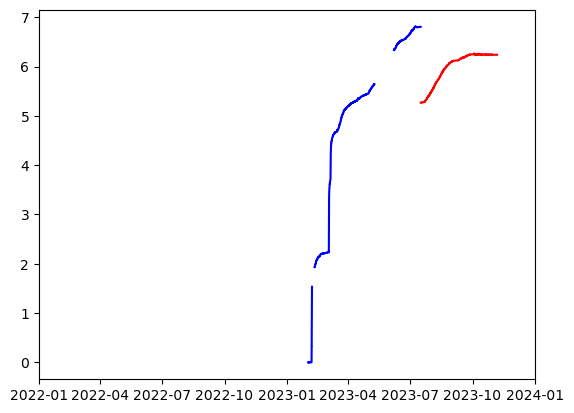

In [6]:
plt.figure()
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2024-01-01'))
plt.plot(pd.to_datetime(df_imp_R['ismpetpasaDay']), df_imp_R['IsmSouth'], 'r')
plt.plot(pd.to_datetime(df_imp_R2['date']), df_imp_R2['dextral slip, mm'], 'b')
plt.show()


In [9]:
df_imp_R2['date'] = pd.to_datetime(df_imp_R2['date'])
df_imp_R['ismpetpasaDay'] = pd.to_datetime(df_imp_R['ismpetpasaDay'])
df_imp_R['IsmSouth'] = df_imp_R['IsmSouth']/math.cos(math.radians(30))

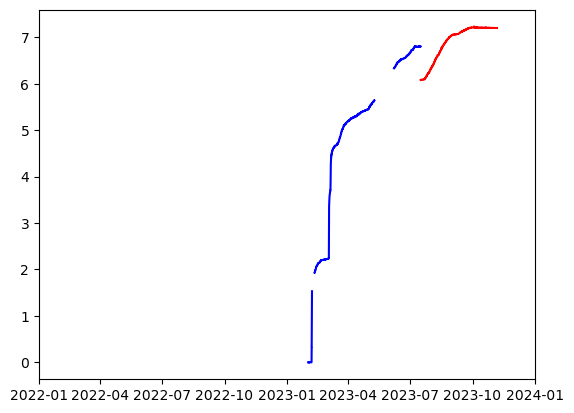

In [10]:
plt.figure()
plt.xlim(pd.to_datetime('2022-01-01'), pd.to_datetime('2024-01-01'))
plt.plot(pd.to_datetime(df_imp_R['ismpetpasaDay']), df_imp_R['IsmSouth'], 'r')
plt.plot(pd.to_datetime(df_imp_R2['date']), df_imp_R2['dextral slip, mm'], 'b')
plt.show()

In [12]:
boolarr = df_imp_R['ismpetpasaDay']>df_imp_R2['date'].iloc[-1]
df_imp_R[boolarr]
df_imp_R = df_imp_R[boolarr]
df_imp_R['IsmSouth'] = df_imp_R['IsmSouth'] + (df_imp_R2['dextral slip, mm'].iloc[-1]-df_imp_R['IsmSouth'].iloc[0])
df_imp_R

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_15110/1077318698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp_R['IsmSouth'] = df_imp_R['IsmSouth'] + (df_imp_R2['dextral slip, mm'].iloc[-1]-df_imp_R['IsmSouth'].iloc[0])


,ismpetpasaDay,IsmSouth,IsmDegC,IsmRain,IsmmB,IsmNorth
1,2023-07-16 16:16:00,6.806505,27.53,0.0,907.8,0.0587
2,2023-07-16 16:17:00,6.806505,27.51,0.0,907.8,0.0590
3,2023-07-16 16:18:00,6.806505,27.51,0.0,907.8,0.0587
4,2023-07-16 16:19:00,6.806505,27.48,0.0,907.9,0.0587
5,2023-07-16 16:20:00,6.806159,27.46,0.0,907.8,0.0587
...,...,...,...,...,...,...
161731,2023-11-05 23:46:00,7.925872,14.12,0.0,901.3,0.3103
161732,2023-11-05 23:47:00,7.925872,14.12,0.0,901.3,0.3103
161733,2023-11-05 23:48:00,7.925872,14.12,0.0,901.4,0.3103
161734,2023-11-05 23:49:00,7.925872,14.10,0.0,901.3,0.3103


In [13]:
df_imp_Romain = pd.concat([df_imp_R2,df_imp_R.rename(columns={'ismpetpasaDay':'date','IsmSouth':'dextral slip, mm','IsmmB':'barometer mb','IsmRain':'rainmm','IsmDegC':'degC'})],ignore_index=True)
df_imp_Romain

,date,degC,rainmm,barometer mb,"dextral slip, mm",IsmNorth
0,2023-02-01 00:02:00,1.18,0.0,897.0,0.000000,NaN
1,2023-02-01 00:03:00,1.18,0.0,896.9,0.000000,NaN
2,2023-02-01 00:04:00,1.18,0.0,897.0,0.000000,NaN
3,2023-02-01 00:05:00,1.18,0.0,896.9,0.000000,NaN
4,2023-02-01 00:06:00,1.18,0.0,896.9,0.000000,NaN
...,...,...,...,...,...,...
358789,2023-11-05 23:46:00,14.12,0.0,901.3,7.925872,0.3103
358790,2023-11-05 23:47:00,14.12,0.0,901.3,7.925872,0.3103
358791,2023-11-05 23:48:00,14.12,0.0,901.4,7.925872,0.3103
358792,2023-11-05 23:49:00,14.10,0.0,901.3,7.925872,0.3103


In [14]:
df_pressure = pd.read_csv('../../../Data/North_Anatolian_Fault/CSV/ISW_Pressure.csv')
df_pressure['transmittedDAY'] = pd.to_datetime(df_pressure['transmittedDAY'],dayfirst=True)
df_pressure['TransSmm'] = df_pressure['TransSmm']/math.cos(math.radians(30))
df_pressure.sort_values(by='transmittedDAY',inplace=True)
df_pressure.reset_index(inplace=True,drop=True)
df_pressure

/var/folders/56/47k8q3q1449cq8kwzkz5r8ch0000gr/T/ipykernel_15110/1417629469.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pressure['transmittedDAY'] = pd.to_datetime(df_pressure['transmittedDAY'],dayfirst=True)


,transmittedDAY,TransSmm,transDegC,TransRain,Transmb
0,2019-12-21 01:50:00,-22.721273,2.48,0.0,908.5
1,2019-12-21 01:51:00,-22.721273,2.45,0.0,908.5
2,2019-12-21 01:52:00,-22.721273,2.48,0.0,908.5
3,2019-12-21 01:53:00,-22.721620,2.45,0.0,908.5
4,2019-12-21 01:54:00,-22.721620,2.48,0.0,908.5
...,...,...,...,...,...
1659644,2023-06-21 23:32:00,5.823386,18.46,0.0,908.3
1659645,2023-06-21 23:33:00,5.822924,18.44,0.0,908.2
1659646,2023-06-21 23:34:00,5.822924,18.44,0.0,908.2
1659647,2023-06-21 23:35:00,5.822924,18.41,0.0,908.2


In [15]:
boolarr = pd.to_datetime(df_pressure['transmittedDAY']) <= dt.datetime(2023,2,1,0,2,0)
df_pressure = df_pressure[boolarr]
df_pressure['TransSmm'] = df_pressure['TransSmm'] + 0.747501
df_pressure

NameError: name 'dt' is not defined

In [ ]:
df_imp_Romain = pd.concat([df_imp_Romain,df_pressure.rename(columns={'transmittedDAY':'date','TransSmm':'dextral slip, mm','Transmb':'barometer mb','TransRain':'rainmm','transDegC':'degC'})],ignore_index=True)
df_imp_Romain.sort_values(by='date',inplace=True)
df_imp_Romain.reset_index(inplace=True,drop=True)
df_imp_Romain

In [ ]:
plt.figure()
plt.plot(df_imp_Romain['date'], df_imp_Romain['dextral slip, mm'], 'r')
plt.plot(df_pressure['transmittedDAY'], df_pressure['TransSmm'], 'b')  
plt.show()

In [ ]:
df_imp_Romain.to_csv('../../../Data/North_Anatolian_Fault/CSV/ISW_for_Romain.csv')

In [ ]:
Creepmeter_dataframe = pd.read_csv('../../../Data/DATA_tidied/creepmeter_metadata_post_standardisation_sac_codes_updated.csv',index_col=0)
Creepmeter_dataframe.drop_duplicates('Creepmeter_abbrv',inplace=True)
Creepmeter_dataframe.drop(Creepmeter_dataframe[Creepmeter_dataframe['Creepmeter_abbrv']!='ISW1'].index,inplace=True)
Creepmeter_dataframe.reset_index(inplace=True,drop=True)
Creepmeter_dataframe